# Hebbian Learninng
Hebbian learning is a learning rule based on neuroscience, proposed by Canadian psychologist Donald Hebb in 1949. The core idea of Hebb's theory can be summarized as : "Cells taht fire together, wire together." This means that when tow neurons are activated simultaneously, the strength of the connection between them increases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HebbianNetwork:
    def __init__(self, input_size, output_size=1, learning_rate=0.1):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.learning_rate = learning_rate
    
    def train(self, X, y, epochs=1):
        for e in range(epochs):
            for i in range(len(X)):
                # Forward propagation
                output = self.predict(X[i])

                # Update weights using Hebbian learning rule
                delta_w = self.learning_rate * np.outer(X[i], output)
                self.weights += delta_w

    def predict(self, x):
        return np.dot(x, self.weights)

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            pred = self.predict(X[i])
            if (pred > 0 and y[i] == 1) or (pred <= 0 and y[i] == -1):  # Fixed condition
                correct += 1
        return correct / len(X)  # Added return statement

Letter association example:
Original A pattern output: [6.29401728 5.96561971 2.82095803]
Original B pattern output: [4.91747743 7.83833587 3.43254256]
Original C pattern output: [2.78806725 4.00734727 4.60473245]
Test pattern output: [6.34160618 6.43462606 3.13972368]


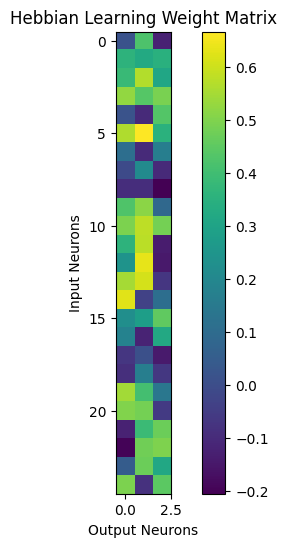


Color association example:

Color association test:
Red input output: [2.11168646 0.2112644  0.22670701]
Green input output: [0.26712347 2.29831292 0.16812119]
Blue input output: [0.25560206 0.0193558  2.11451313]
Color names output: [1.59541392 1.43342221 1.85931076]
Test color output: [0.79484574 0.25571927 0.02166642]


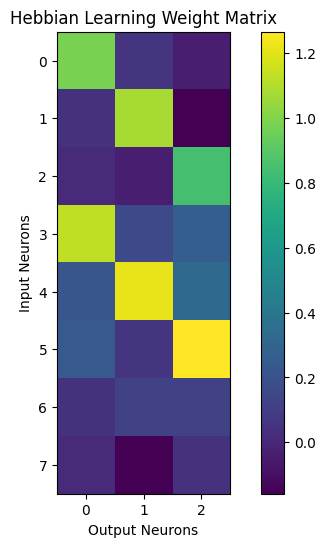

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class HebbianNetwork:
    def __init__(self, input_size, output_size, learning_rate=0.1):
        """
        Initialize the Hebbian network
        :param input_size: Size of the input layer
        :param output_size: Size of the output layer
        :param learning_rate: Learning rate
        """
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.learning_rate = learning_rate
        
    def train(self, input_pattern, output_pattern, epochs=1):
        """
        Train the network
        :param input_pattern: Input pattern
        :param output_pattern: Output pattern
        :param epochs: Number of training epochs
        """
        input_pattern = np.array(input_pattern)
        output_pattern = np.array(output_pattern)
        
        for _ in range(epochs):
            # Hebbian learning rule: Δw = η * x * y
            delta_w = self.learning_rate * np.outer(input_pattern, output_pattern)
            self.weights += delta_w
            
    def predict(self, input_pattern):
        """
        Predict the output
        :param input_pattern: Input pattern
        :return: Output activation values
        """
        input_pattern = np.array(input_pattern)
        return np.dot(input_pattern, self.weights)
    
    def visualize_weights(self):
        """Visualize the weight matrix"""
        plt.figure(figsize=(8, 6))
        plt.imshow(self.weights, cmap='viridis', interpolation='nearest')
        plt.colorbar()
        plt.title('Hebbian Learning Weight Matrix')
        plt.xlabel('Output Neurons')
        plt.ylabel('Input Neurons')
        plt.show()

# Example: Learning simple letter associations
def example_letter_association():
    # Define input patterns (simple letter representations)
    # Each letter is represented by a 5x5 binary matrix
    A = np.array([
        [0, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1]
    ]).flatten()
    
    B = np.array([
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 0]
    ]).flatten()
    
    C = np.array([
        [0, 1, 1, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1]
    ]).flatten()
    
    # Create the network (25 input neurons, 3 output neurons for A, B, C)
    network = HebbianNetwork(input_size=25, output_size=3, learning_rate=0.1)
    
    # Train the network to associate letters with categories
    # Output patterns: A=[1,0,0], B=[0,1,0], C=[0,0,1]
    network.train(A, [1, 0, 0], epochs=5)
    network.train(B, [0, 1, 0], epochs=5)
    network.train(C, [0, 0, 1], epochs=5)
    
    # Test the network
    test_pattern = np.array([
        [0, 1, 1, 1, 0],  # Similar to A but with noise
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 0, 0, 1, 1]  # Slightly different at the end
    ]).flatten()
    
    print("Original A pattern output:", network.predict(A))
    print("Original B pattern output:", network.predict(B))
    print("Original C pattern output:", network.predict(C))
    print("Test pattern output:", network.predict(test_pattern))
    
    # Visualize the weights
    network.visualize_weights()

# Example: Learning color and text associations
def example_color_association():
    # Define input patterns (RGB colors + text descriptions)
    # Each color is represented by 3 values (RGB) + 5 text features
    red = np.array([1, 0, 0, 1, 0, 0, 0, 0])  # RGB=1,0,0 + features for the word "red"
    green = np.array([0, 1, 0, 0, 1, 0, 0, 0])
    blue = np.array([0, 0, 1, 0, 0, 1, 0, 0])
    color_names = np.array([0, 0, 0, 1, 1, 1, 0, 0])  # Text features
    
    # Create the network (8 input neurons, 3 output neurons for red, green, blue)
    network = HebbianNetwork(input_size=8, output_size=3, learning_rate=0.1)
    
    # Train the network
    network.train(red, [1, 0, 0], epochs=10)
    network.train(green, [0, 1, 0], epochs=10)
    network.train(blue, [0, 0, 1], epochs=10)
    network.train(color_names, [0.5, 0.5, 0.5], epochs=5)  # Associate text with all colors
    
    # Test the network
    print("\nColor association test:")
    print("Red input output:", network.predict(red))
    print("Green input output:", network.predict(green))
    print("Blue input output:", network.predict(blue))
    print("Color names output:", network.predict(color_names))
    
    # Test partial information
    test_color = np.array([0.8, 0.2, 0.1, 0, 0, 0, 0, 0])  # Mostly red
    print("Test color output:", network.predict(test_color))
    
    # Visualize the weights
    network.visualize_weights()

if __name__ == "__main__":
    print("Letter association example:")
    example_letter_association()
    
    print("\nColor association example:")
    example_color_association()

Training accuracy: 0.20
Test accuracy: 0.67


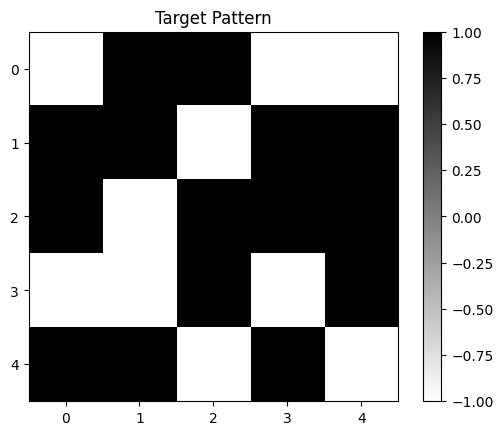

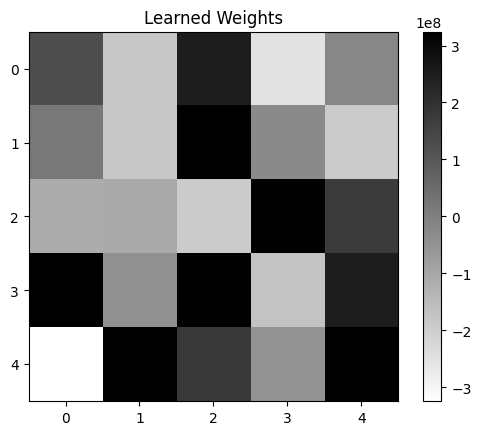


Testing Recognition:
Pattern 1: Recognized as target? No


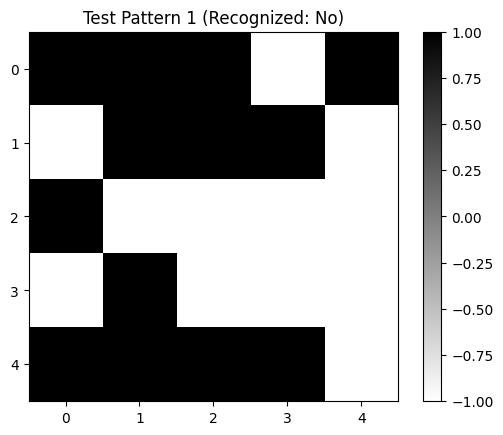

Pattern 2: Recognized as target? No


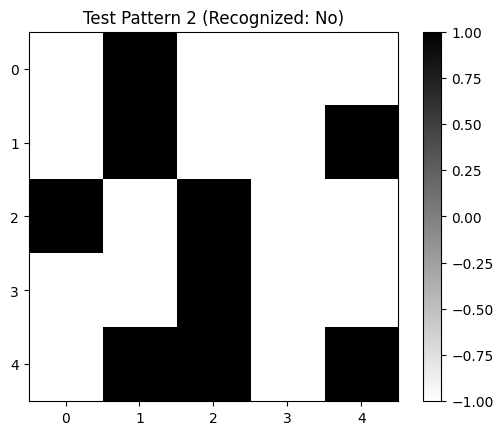

Pattern 3: Recognized as target? Yes


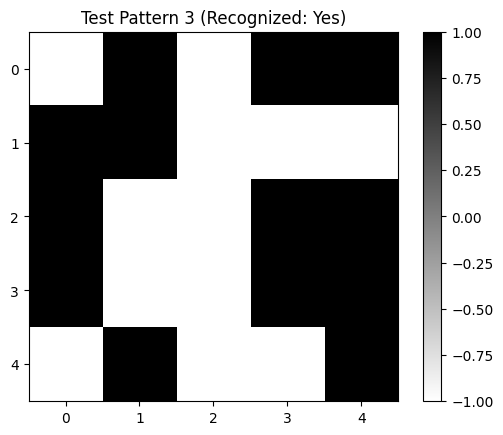

In [6]:
# Example: Pattern Recognition
def createpatterns(size, numpatterns):
    patterns = []
    for u in range(numpatterns):
        pattern = np.random.choice([1, 1], size=size)
        patterns.append(pattern)

    return patterns

# Create training data
input_size = 25  # 5x5 pattern
X_train = create_patterns(input_size, 5)
# Assume we want to learn to recognize the first pattern
y_train = np.array([1 if (x == X_train[0]).all() else -1 for x in X_train])  # Fixed to use -1 for non-target

# Create test data
X_test = create_patterns(input_size, 3)
# Add some noise to the test set
for i in range(len(X_test)):
    if np.random.rand() > 0.7:
        X_test[i] = X_test[i] * np.random.choice([-1, 1], size=input_size)  # Fixed noise generation

y_test = np.array([1 if (x == X_train[0]).all() else -1 for x in X_test])  # Fixed to use -1 for non-target

# Create and train the network
network = HebbianNetwork(input_size, output_size=1, learning_rate=0.1)  # Fixed output_size to match y dimension
network.train(X_train, y_train, epochs=10)

# Evaluation 
train_acc = network.evaluate(X_train, y_train)
test_acc = network.evaluate(X_test, y_test)  # Fixed method name
print(f"Training accuracy: {train_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

# Visualization
def plot_pattern(pattern, title):
    plt.imshow(pattern.reshape(5, 5), cmap='binary')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize the target pattern
plot_pattern(X_train[0], "Target Pattern")

# Visualize the learned weights
plot_pattern(network.weights, "Learned Weights")

# Test the network's recognition ability
print("\nTesting Recognition:")
for i in range(len(X_test)):
    pred = network.predict(X_test[i])
    recognized = "Yes" if pred > 0 else "No"
    print(f"Pattern {i+1}: Recognized as target? {recognized}")
    plot_pattern(X_test[i], f"Test Pattern {i+1} (Recognized: {recognized})")

Training accuracy: 0.60
Test accuracy: 0.00


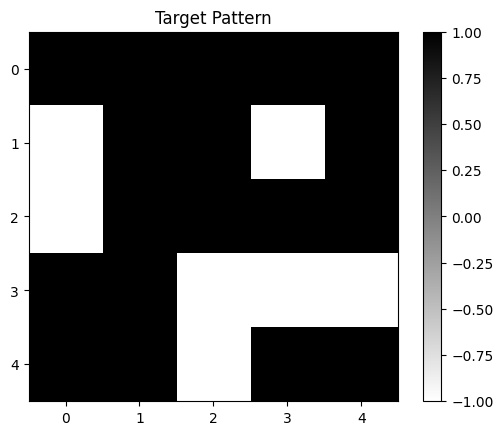

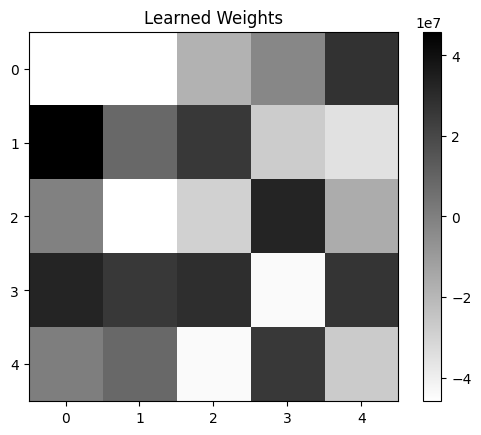


Testing Recognition:
Pattern 1: Recognized as target? Yes


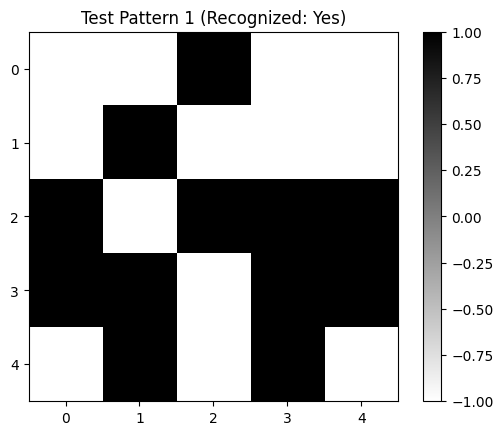

Pattern 2: Recognized as target? Yes


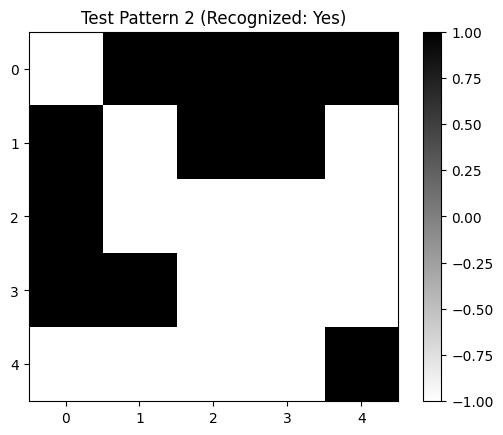

Pattern 3: Recognized as target? Yes


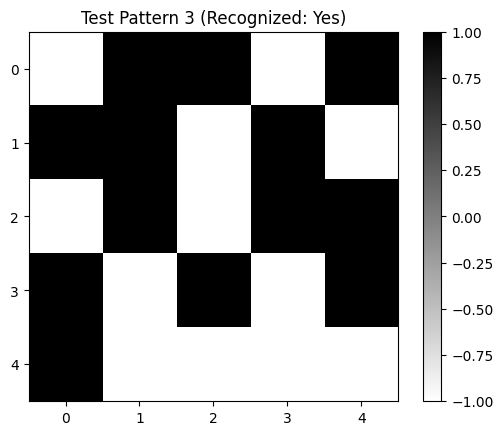

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class HebbianNetwork:
    def __init__(self, input_size, output_size=1, learning_rate=0.1):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.learning_rate = learning_rate
    
    def train(self, X, y, epochs=1):
        for e in range(epochs):
            for i in range(len(X)):
                # Forward propagation
                output = self.predict(X[i])

                # Update weights using Hebbian learning rule
                delta_w = self.learning_rate * np.outer(X[i], output)
                self.weights += delta_w

    def predict(self, x):
        return np.dot(x, self.weights)

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            pred = self.predict(X[i])
            if (pred > 0 and y[i] == 1) or (pred <= 0 and y[i] == -1):  # Fixed condition
                correct += 1
        return correct / len(X)  # Added return statement

# Example usage
def create_patterns(size, num_patterns):
    patterns = []
    for _ in range(num_patterns):
        pattern = np.random.choice([-1, 1], size=size)  # Fixed to use -1/1 for better Hebbian learning
        patterns.append(pattern)
    return patterns

# Create training data
input_size = 25  # 5x5 pattern
X_train = create_patterns(input_size, 5)
# Assume we want to learn to recognize the first pattern
y_train = np.array([1 if (x == X_train[0]).all() else -1 for x in X_train])  # Fixed to use -1 for non-target

# Create test data
X_test = create_patterns(input_size, 3)
# Add some noise to the test set
for i in range(len(X_test)):
    if np.random.rand() > 0.7:
        X_test[i] = X_test[i] * np.random.choice([-1, 1], size=input_size)  # Fixed noise generation

y_test = np.array([1 if (x == X_train[0]).all() else -1 for x in X_test])  # Fixed to use -1 for non-target

# Create and train the network
network = HebbianNetwork(input_size, output_size=1, learning_rate=0.1)  # Fixed output_size to match y dimension
network.train(X_train, y_train, epochs=10)

# Evaluation 
train_acc = network.evaluate(X_train, y_train)
test_acc = network.evaluate(X_test, y_test)  # Fixed method name
print(f"Training accuracy: {train_acc:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

# Visualization
def plot_pattern(pattern, title):
    plt.imshow(pattern.reshape(5, 5), cmap='binary')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Visualize the target pattern
plot_pattern(X_train[0], "Target Pattern")

# Visualize the learned weights
plot_pattern(network.weights, "Learned Weights")

# Test the network's recognition ability
print("\nTesting Recognition:")
for i in range(len(X_test)):
    pred = network.predict(X_test[i])
    recognized = "Yes" if pred > 0 else "No"
    print(f"Pattern {i+1}: Recognized as target? {recognized}")
    plot_pattern(X_test[i], f"Test Pattern {i+1} (Recognized: {recognized})")


Testing perfect recall:
Input: 'HELLO WORLD'
Output: [ 2.56209687e+43  1.12231992e+43  1.95730230e+43 -4.86232151e+43]
Recalled as: 'HELLO WORLD'
Confidence: 25620968669036308144284261691531029383217152.00

Input: 'MACHINE LEARNING'
Output: [ 1.76422520e+43  7.72750260e+42  1.34771757e+43 -3.34785032e+43]
Recalled as: 'HELLO WORLD'
Confidence: 17642251952852336948896600507222300871884800.00

Input: 'HEBBIAN RULE'
Output: [ 3.78957286e+43  1.65999858e+43  2.89501514e+43 -7.19175206e+43]
Recalled as: 'HELLO WORLD'
Confidence: 37895728553083442577991916195564528565485568.00

Input: 'NEURAL NETWORKS'
Output: [ 4.75354282e+43  2.08230196e+43  3.63146854e+43 -9.02133329e+43]
Recalled as: 'HELLO WORLD'
Confidence: 47535428199094523996215183503693318335758336.00


Testing noisy recall:
Input: 'HELLO' with 50% noise
Output: [ 4.94268294e+43  2.16512266e+43  3.77593446e+43 -9.38014395e+43]
Recalled as: 'HELLO WORLD'
Confidence: 49426829416254494044721433330230616580423680.00

Input: 'LEARNING' 

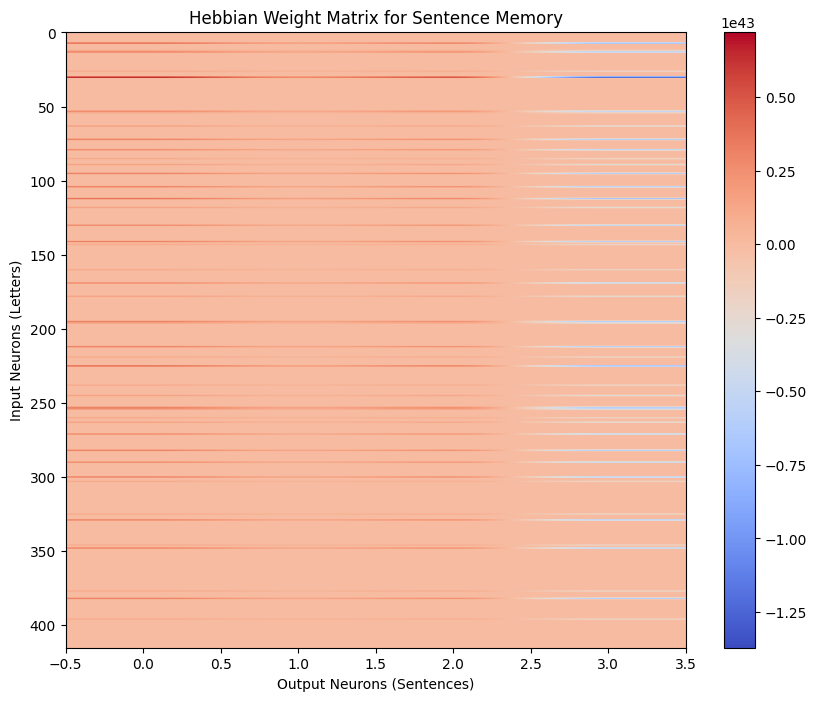

In [2]:
# Sentence Memory Example
def sentence_memory_example():
    # Define our sentences to memorize
    sentences = [
        "HELLO WORLD",
        "MACHINE LEARNING",
        "HEBBIAN RULE",
        "NEURAL NETWORKS"
    ]
    
    # Parameters
    max_length = max(len(s) for s in sentences)
    vocab_size = 26  # A-Z
    input_size = max_length * vocab_size
    output_size = len(sentences)
    
    # Create the network
    network = HebbianNetwork(input_size, output_size, learning_rate=0.1)
    
    # Function to encode a sentence as a binary pattern
    def encode_sentence(sentence):
        encoded = np.zeros(input_size)
        for i, char in enumerate(sentence):
            if char == ' ':
                continue  # Skip spaces
            char_idx = ord(char.upper()) - ord('A')
            if 0 <= char_idx < 26:
                encoded[i * vocab_size + char_idx] = 1
        return encoded
    
    # Create training data
    X_train = [encode_sentence(s) for s in sentences]
    # Each sentence gets its own output unit
    y_train = np.eye(len(sentences))  # One-hot encoding
    
    # Train the network
    network.train(X_train, y_train, epochs=100)
    
    # Test recall
    print("\nTesting perfect recall:")
    for i, sentence in enumerate(sentences):
        output = network.predict(X_train[i])
        recalled_idx = np.argmax(output)
        print(f"Input: '{sentence}'")
        print(f"Output: {output}")
        print(f"Recalled as: '{sentences[recalled_idx]}'")
        print(f"Confidence: {output[recalled_idx]:.2f}\n")
    
    # Test with noisy/partial inputs
    print("\nTesting noisy recall:")
    test_cases = [
        ("HELLO", 0.5),    # Partial first sentence
        ("LEARNING", 0.7), # Partial second sentence
        ("RULE", 0.6),     # Partial third sentence
        ("NET", 0.4)       # Partial fourth sentence
    ]
    
    for sentence, noise_level in test_cases:
        # Create noisy version
        encoded = encode_sentence(sentence)
        noise_mask = np.random.random(len(encoded)) < noise_level
        noisy_encoded = encoded.copy()
        noisy_encoded[noise_mask] = 1 - noisy_encoded[noise_mask]  # Flip bits
        
        output = network.predict(noisy_encoded)
        recalled_idx = np.argmax(output)
        print(f"Input: '{sentence}' with {noise_level*100:.0f}% noise")
        print(f"Output: {output}")
        print(f"Recalled as: '{sentences[recalled_idx]}'")
        print(f"Confidence: {output[recalled_idx]:.2f}\n")
    
    # Visualize the weight matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(network.weights, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.title("Hebbian Weight Matrix for Sentence Memory")
    plt.xlabel("Output Neurons (Sentences)")
    plt.ylabel("Input Neurons (Letters)")
    plt.show()

if __name__ == "__main__":
    sentence_memory_example()